## Data analytics algorithm implementation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load Batting and Bowling datasets
batting_df = pd.read_csv("batting_data.csv")
bowling_df = pd.read_csv("bowling_data.csv")

# Display first few rows
batting_df.head()



,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [3]:
bowling_df.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [4]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   out/not_out  699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB


In [5]:
batting_df['SR'] = pd.to_numeric(batting_df['SR'], errors='coerce')


In [6]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    object 
 3   overs        500 non-null    float64
 4   maiden       500 non-null    int64  
 5   runs         500 non-null    int64  
 6   wickets      500 non-null    int64  
 7   economy      500 non-null    float64
 8   0s           500 non-null    int64  
 9   4s           500 non-null    int64  
 10  6s           500 non-null    int64  
 11  wides        500 non-null    int64  
 12  noBalls      500 non-null    int64  
 13  match_id     500 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 54.8+ KB


In [7]:
print("batting_data \n",batting_df.isnull().sum())
print("\n\nbowling_data \n",bowling_df.isnull().sum())


batting_data 
 match           0
teamInnings     0
battingPos      0
batsmanName     0
runs            0
balls           0
4s              0
6s              0
SR             11
out/not_out     0
match_id        0
dtype: int64


bowling_data 
 match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
match_id       0
dtype: int64


In [8]:
## In batting_data - SR , we have null - we have to remove it

batting_df['SR'].replace(np.nan, 0, inplace=True)

C:\Users\Himanshu-Singh\AppData\Local\Temp\ipykernel_11508\1021259760.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_df['SR'].replace(np.nan, 0, inplace=True)


In [9]:
## Feature Selection
X_batting = batting_df[['runs', 'balls', '4s', '6s']]
y_batting = batting_df['SR']  # Strike Rate

X_bowling = bowling_df[['overs', 'maiden', 'runs', 'wickets', '0s', '4s', '6s', 'wides', 'noBalls']]
y_bowling = bowling_df['economy']

In [10]:
# Batting
X_train_bat, X_test_bat, y_train_bat, y_test_bat = train_test_split(X_batting, y_batting, test_size=0.2, random_state=42)

# Bowling
X_train_bowl, X_test_bowl, y_train_bowl, y_test_bowl = train_test_split(X_bowling, y_bowling, test_size=0.2, random_state=42)


In [ ]:

#Linear Regression
mlr_bat = LinearRegression()
mlr_bat.fit(X_train_bat, y_train_bat)
y_pred_mlr_bat = mlr_bat.predict(X_test_bat)

mlr_bowl = LinearRegression()
mlr_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_mlr_bowl = mlr_bowl.predict(X_test_bowl)


In [ ]:
#Polinomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_bat = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_bat.fit(X_train_bat, y_train_bat)
y_pred_poly_bat = poly_bat.predict(X_test_bat)

poly_bowl = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_poly_bowl = poly_bowl.predict(X_test_bowl)


In [ ]:
# RANSAC REgression

from sklearn.linear_model import RANSACRegressor

ransac_bat = RANSACRegressor()
ransac_bat.fit(X_train_bat, y_train_bat)
y_pred_ransac_bat = ransac_bat.predict(X_test_bat)

ransac_bowl = RANSACRegressor()
ransac_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_ransac_bowl = ransac_bowl.predict(X_test_bowl)


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt_bat = DecisionTreeRegressor()
dt_bat.fit(X_train_bat, y_train_bat)
y_pred_dt_bat = dt_bat.predict(X_test_bat)

dt_bowl = DecisionTreeRegressor()
dt_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_dt_bowl = dt_bowl.predict(X_test_bowl)


In [ ]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor

rf_bat = RandomForestRegressor(n_estimators=100)
rf_bat.fit(X_train_bat, y_train_bat)
y_pred_rf_bat = rf_bat.predict(X_test_bat)

rf_bowl = RandomForestRegressor(n_estimators=100)
rf_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_rf_bowl = rf_bowl.predict(X_test_bowl)


In [ ]:
# Gaussian Process Regression

from sklearn.gaussian_process import GaussianProcessRegressor

gp_bat = GaussianProcessRegressor()
gp_bat.fit(X_train_bat, y_train_bat)
y_pred_gp_bat = gp_bat.predict(X_test_bat)

gp_bowl = GaussianProcessRegressor()
gp_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_gp_bowl = gp_bowl.predict(X_test_bowl)


In [ ]:
# Support Vector Regression (SVR)

from sklearn.svm import SVR

svr_bat = SVR(kernel='rbf')
svr_bat.fit(X_train_bat, y_train_bat)
y_pred_svr_bat = svr_bat.predict(X_test_bat)

svr_bowl = SVR(kernel='rbf')
svr_bowl.fit(X_train_bowl, y_train_bowl)
y_pred_svr_bowl = svr_bowl.predict(X_test_bowl)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Multiple Linear": (y_test_bat, y_pred_mlr_bat),
    "Polynomial": (y_test_bat, y_pred_poly_bat),
    "RANSAC": (y_test_bat, y_pred_ransac_bat),
    "Decision Tree": (y_test_bat, y_pred_dt_bat),
    "Random Forest": (y_test_bat, y_pred_rf_bat),
    "Gaussian Process": (y_test_bat, y_pred_gp_bat),
    "SVR": (y_test_bat, y_pred_svr_bat)
}

print("\n**Batting Dataset - Model Performance:**")
for name, (y_true, y_pred) in models.items():
    print(f"{name}: R² Score = {r2_score(y_true, y_pred):.4f}, MSE = {mean_squared_error(y_true, y_pred):.4f}")

print("\n**Bowling Dataset - Model Performance:**")
for name, (y_true, y_pred) in models.items():
    print(f"{name}: R² Score = {r2_score(y_true, y_pred):.4f}, MSE = {mean_squared_error(y_true, y_pred):.4f}")



**Batting Dataset - Model Performance:**
Multiple Linear: R² Score = 0.3318, MSE = 2693.4235
Polynomial: R² Score = 0.5188, MSE = 1939.6105
RANSAC: R² Score = -0.0613, MSE = 4278.0727
Decision Tree: R² Score = 0.9647, MSE = 142.2461
Random Forest: R² Score = 0.9522, MSE = 192.7377
Gaussian Process: R² Score = 0.1432, MSE = 3453.7359
SVR: R² Score = 0.2756, MSE = 2919.7790

**Bowling Dataset - Model Performance:**
Multiple Linear: R² Score = 0.3318, MSE = 2693.4235
Polynomial: R² Score = 0.5188, MSE = 1939.6105
RANSAC: R² Score = -0.0613, MSE = 4278.0727
Decision Tree: R² Score = 0.9647, MSE = 142.2461
Random Forest: R² Score = 0.9522, MSE = 192.7377
Gaussian Process: R² Score = 0.1432, MSE = 3453.7359
SVR: R² Score = 0.2756, MSE = 2919.7790


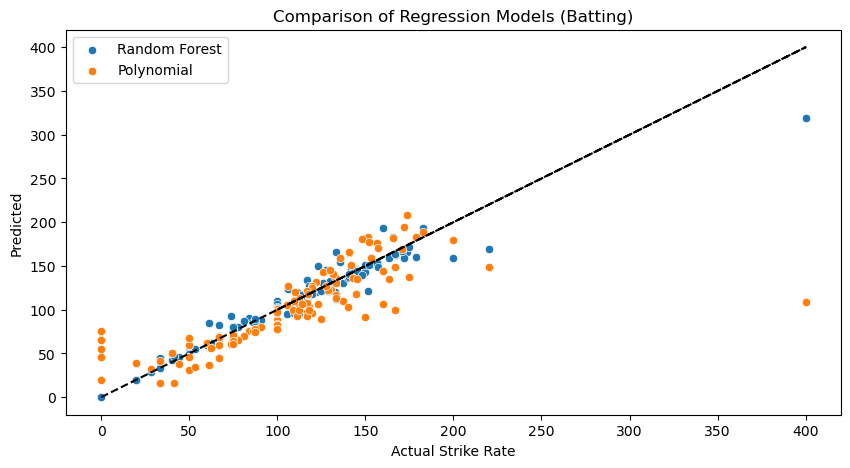

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare actual vs predicted for Batting
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_bat, y=y_pred_rf_bat, label="Random Forest")
sns.scatterplot(x=y_test_bat, y=y_pred_poly_bat, label="Polynomial")
plt.plot(y_test_bat, y_test_bat, color='black', linestyle='--')  # Perfect predictions
plt.xlabel("Actual Strike Rate")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Regression Models (Batting)")
plt.show()

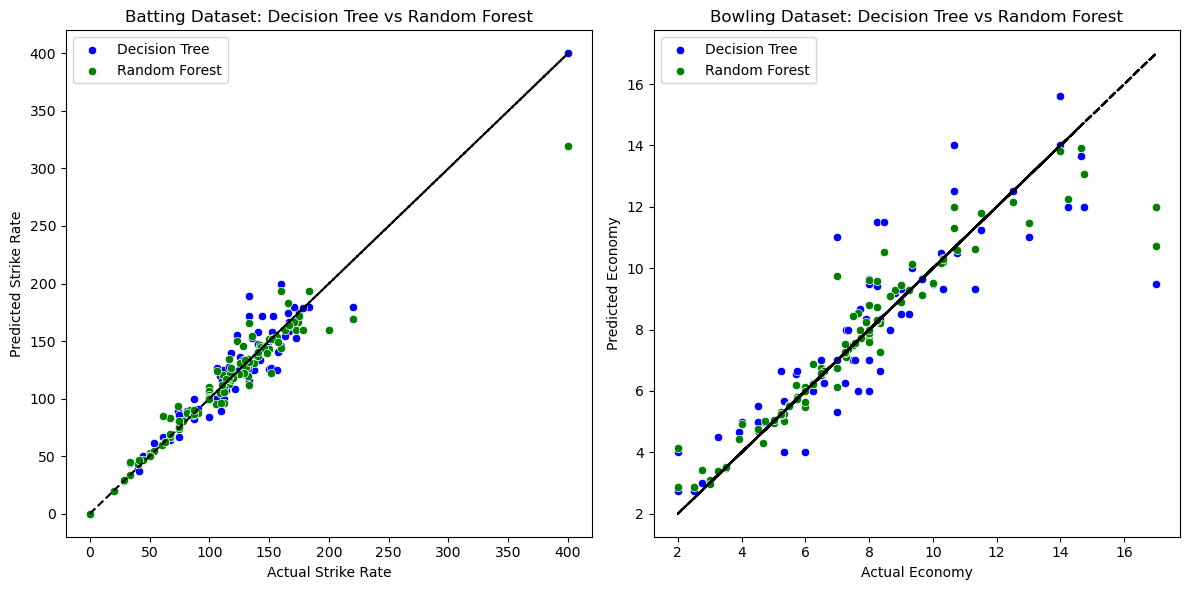

In [22]:
# Graph Comparison between Decision Tree and Random Forest

# Batting Dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_bat, y=y_pred_dt_bat, label="Decision Tree", color="blue")
sns.scatterplot(x=y_test_bat, y=y_pred_rf_bat, label="Random Forest", color="green")
plt.plot(y_test_bat, y_test_bat, color='black', linestyle='--')  # Perfect predictions
plt.xlabel("Actual Strike Rate")
plt.ylabel("Predicted Strike Rate")
plt.title("Batting Dataset: Decision Tree vs Random Forest")
plt.legend()

# Bowling Dataset
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_bowl, y=y_pred_dt_bowl, label="Decision Tree", color="blue")
sns.scatterplot(x=y_test_bowl, y=y_pred_rf_bowl, label="Random Forest", color="green")
plt.plot(y_test_bowl, y_test_bowl, color='black', linestyle='--')  # Perfect predictions
plt.xlabel("Actual Economy")
plt.ylabel("Predicted Economy")
plt.title("Bowling Dataset: Decision Tree vs Random Forest")
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Find the best model based on R² score
best_model = max(models.items(), key=lambda x: r2_score(x[1][0], x[1][1]))
print(f"The best model is {best_model[0]} with R² Score = {r2_score(best_model[1][0], best_model[1][1]):.4f}")

The best model is Decision Tree with R² Score = 0.9647
